In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import webbrowser
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')


In [82]:
df= pd.read_csv('M20_P8_Space_Dataset.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [83]:
df.isnull()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

There Are No Null value in given dataset

In [85]:
data_Info= 'https://en.wikipedia.org/wiki/Right_ascension'

In [86]:
webbrowser.open(data_Info)

True

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [88]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Here we can see numeric description which show us correlation among all columns also we can see positive and negative correlation which give us idea which attribute is more suitable for our model and data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [90]:
df.rename(columns={'class':'Classification'}, inplace=True)

df['Classification'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

we just change name of column for better and clear understanding 

In [91]:
label=LabelEncoder()
for i in df.columns:
    df[i]=label.fit_transform(df[i])

we use label encoder for producing bettter result with numerical value

In [92]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,Classification,redshift,plate,mjd,fiberid
0,0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,5641,2,1681,267,182,490
1,0,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,2267,2,1437,49,6,540
2,0,5405,4118,8203,8155,7210,6793,6350,3,0,3,257,1289,0,8222,21,80,512
3,0,5458,3910,1569,1960,2431,2897,3415,3,0,3,258,5642,2,1162,267,182,509
4,0,5462,4064,1206,1255,3347,4943,5701,3,0,3,258,5642,2,3501,267,182,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1300,8185,4765,4816,5129,5367,5339,16,0,2,150,3999,0,4124,111,37,245
9996,0,1299,8198,2765,4665,5707,5488,6007,16,0,2,151,3997,0,8089,111,37,227
9997,0,1316,8196,4467,6285,7400,7927,8097,16,0,2,151,6240,2,379,459,341,621
9998,0,1311,8204,5071,6921,7442,7735,7408,16,0,2,152,3997,0,3881,111,37,228


In [93]:
df.Classification.value_counts()

0    4998
2    4152
1     850
Name: Classification, dtype: int64

In [94]:
Z_pivot = \
df.pivot_table(index="Classification", values="z", aggfunc=np.median)

In [95]:
Z_pivot

,z
Classification,
0,3933.0
1,9298.5
2,5490.5


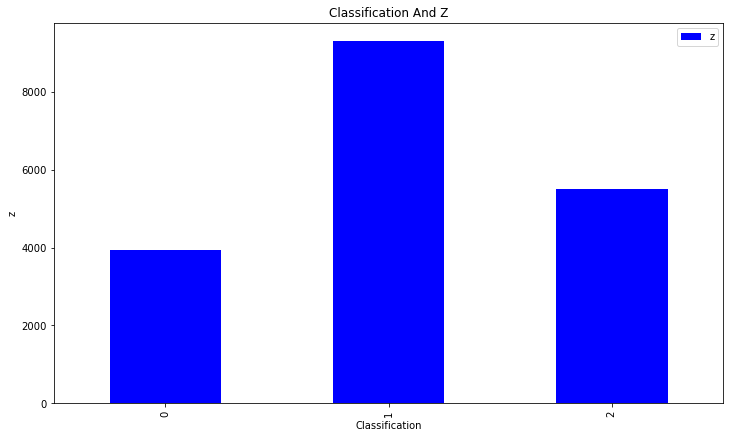

In [96]:
Z_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel('Classification')
plt.ylabel('z')
plt.title('Classification And Z')
plt.xticks(rotation=90)
plt.show()

In above figure we are seeing Pivote Table of Classification Here we can Easily see that count of 1=QSO is maximum followedd by 2=Star and 0=Galaxy With Respect to "Z"

In [97]:
U_pivot = \
df.pivot_table(index="Classification", values="u", aggfunc=np.median)

In [98]:
G_pivot = \
df.pivot_table(index="Classification", values="g", aggfunc=np.median)

In [99]:
R_pivot = \
df.pivot_table(index="Classification", values="r", aggfunc=np.median)

In [100]:
I_pivot = \
df.pivot_table(index="Classification", values="i", aggfunc=np.median)

In [101]:
Dev_Exp= [U_pivot,G_pivot,R_pivot,I_pivot,Z_pivot]

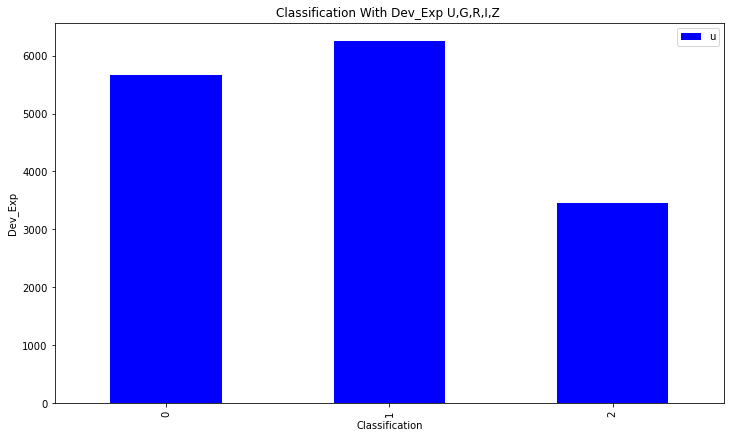

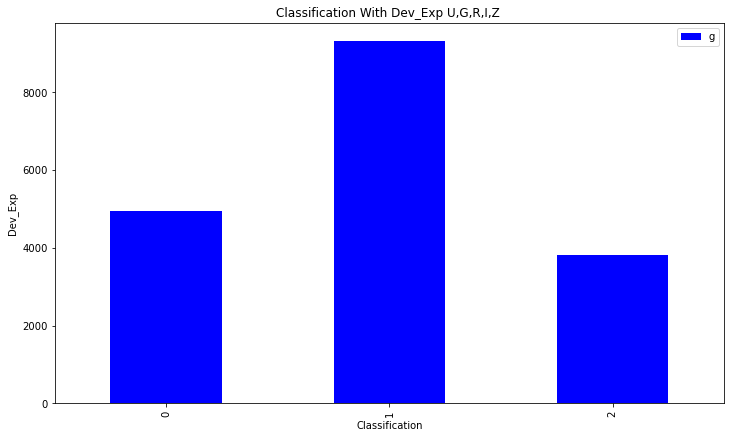

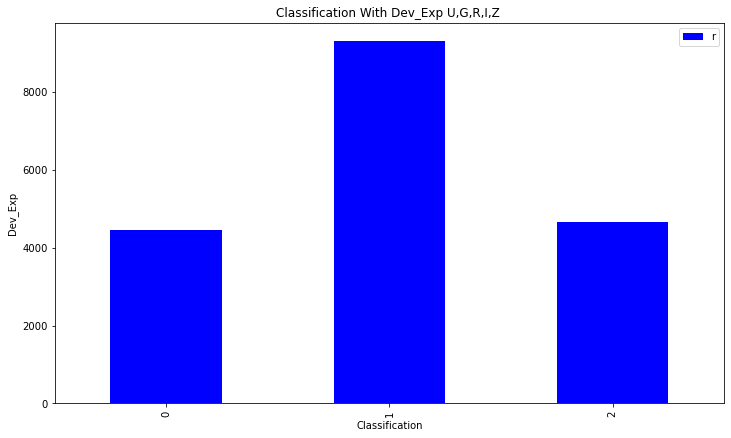

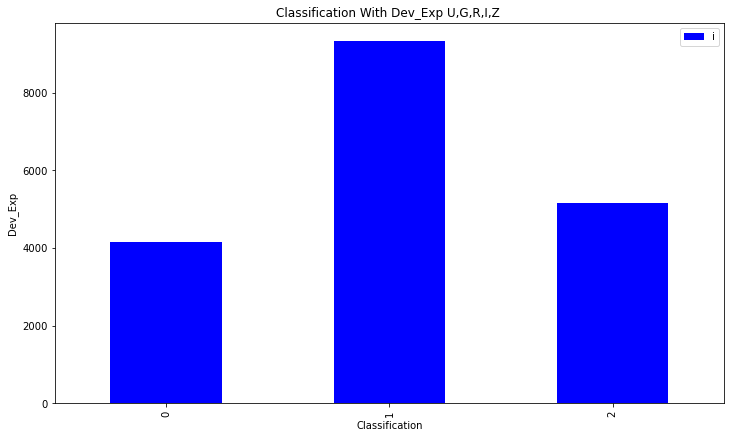

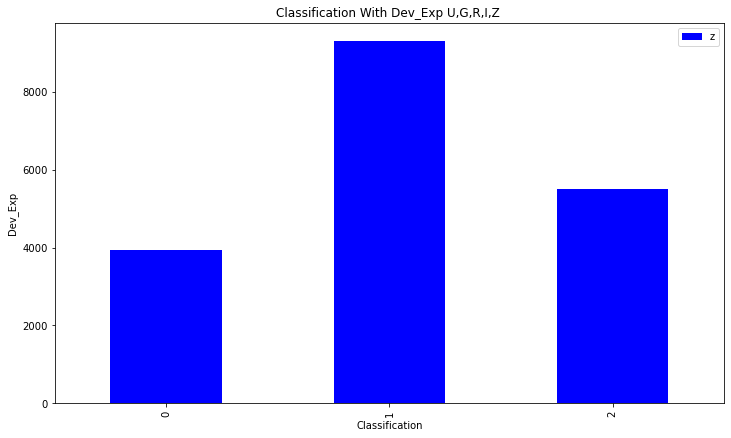

In [102]:
for i in Dev_Exp:
    i.plot(kind='bar', color='blue',figsize=(12,7))
    plt.xlabel('Classification')
    plt.ylabel('Dev_Exp')
    plt.title('Classification With Dev_Exp U,G,R,I,Z ')
    plt.xticks(rotation=90)
    plt.show()

In above figure we are seeing Pivote Table of Classification Here we can Easily see that count of 1=QSO, 2=Star and 0=Galaxy With Respect to U,G,R,I,Z which are represent the response of the 5 bands of the telescope.

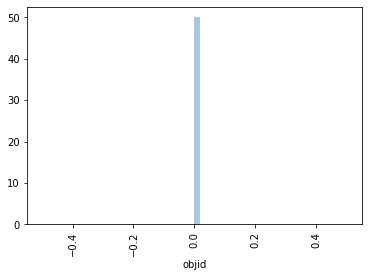

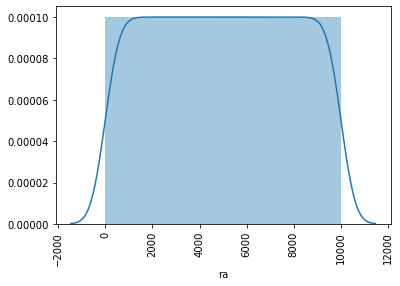

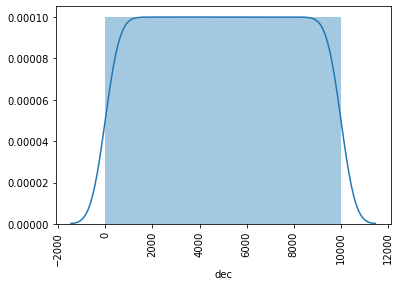

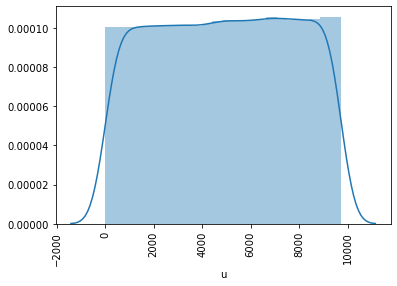

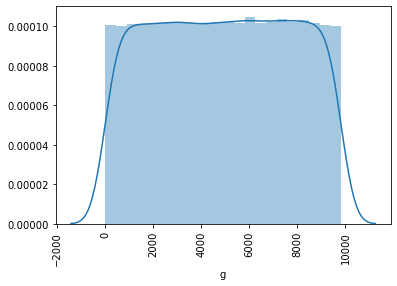

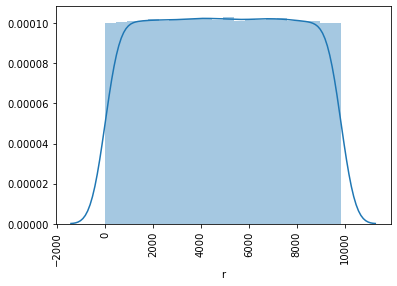

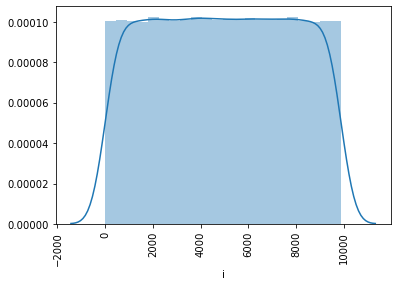

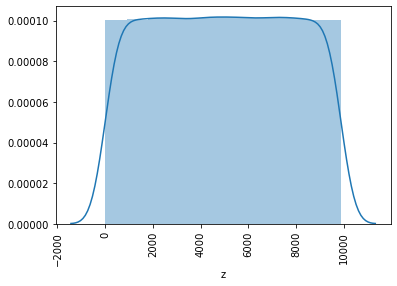

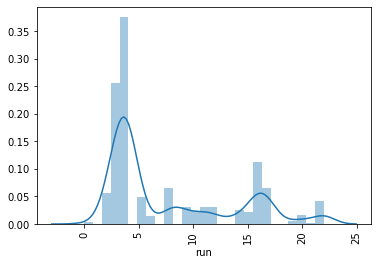

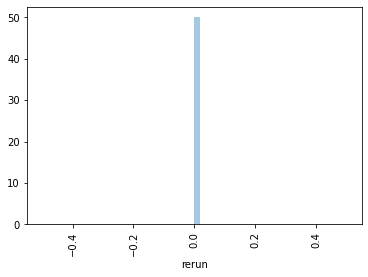

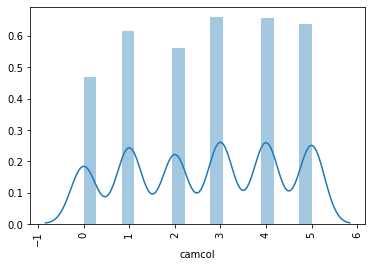

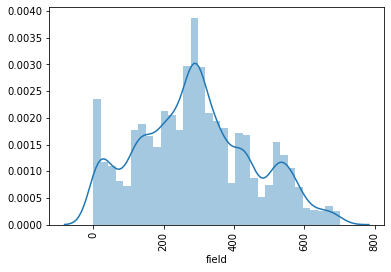

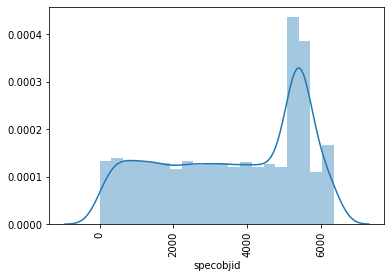

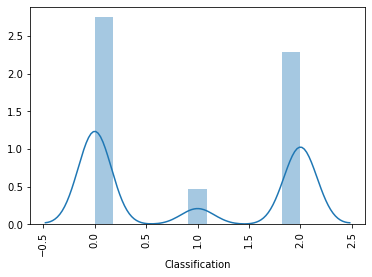

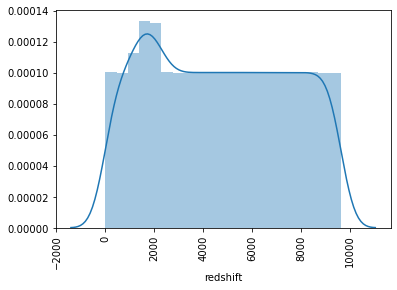

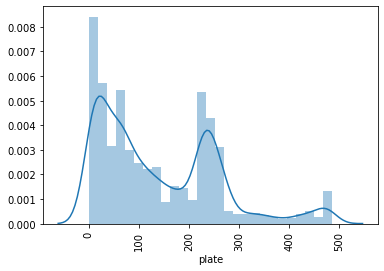

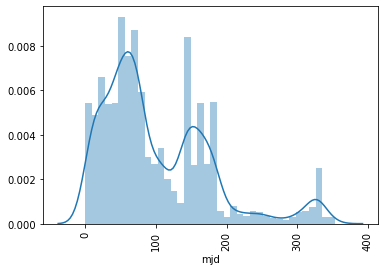

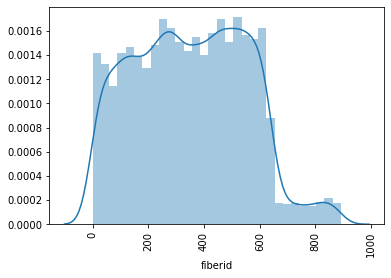

In [103]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

we again create visual represantation for each attributes we can see if there are skewness present in attributes

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

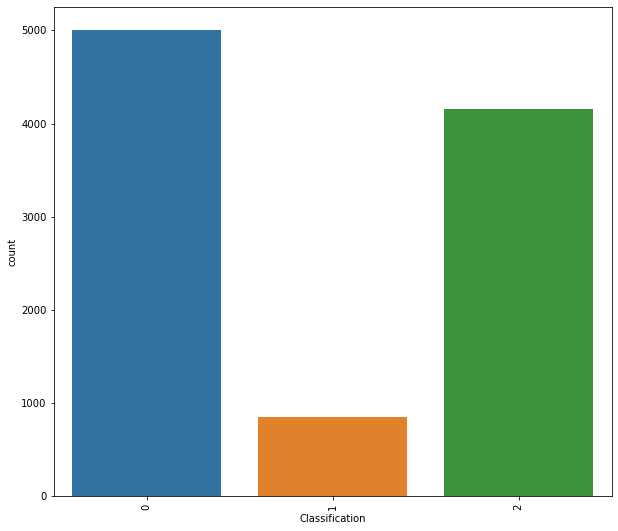

In [104]:
plt.figure(figsize=(10,9))
sns.countplot(df.Classification)
plt.xticks(rotation=90)

In above figure we are seeing Total Count of Classification Here we can Easily see that count of 0=Galaxy is maximum followedd by 2=Star and 1=QSO

In [105]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,Classification,redshift,plate,mjd,fiberid
0,0,5378,4030,8818,3143,1853,1594,1474,3,0,3,256,5641,2,1681,267,182,490
1,0,5392,4145,4066,3722,4220,4703,4956,3,0,3,256,2267,2,1437,49,6,540
2,0,5405,4118,8203,8155,7210,6793,6350,3,0,3,257,1289,0,8222,21,80,512
3,0,5458,3910,1569,1960,2431,2897,3415,3,0,3,258,5642,2,1162,267,182,509
4,0,5462,4064,1206,1255,3347,4943,5701,3,0,3,258,5642,2,3501,267,182,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1300,8185,4765,4816,5129,5367,5339,16,0,2,150,3999,0,4124,111,37,245
9996,0,1299,8198,2765,4665,5707,5488,6007,16,0,2,151,3997,0,8089,111,37,227
9997,0,1316,8196,4467,6285,7400,7927,8097,16,0,2,151,6240,2,379,459,341,621
9998,0,1311,8204,5071,6921,7442,7735,7408,16,0,2,152,3997,0,3881,111,37,228


We can see by comparing above data that:
Star=2
Galaxy=0
and QSO(Quasar Object)=1

(array([   0,    1,    2, ..., 6346, 6347, 6348]),
 <a list of 6349 Text major ticklabel objects>)

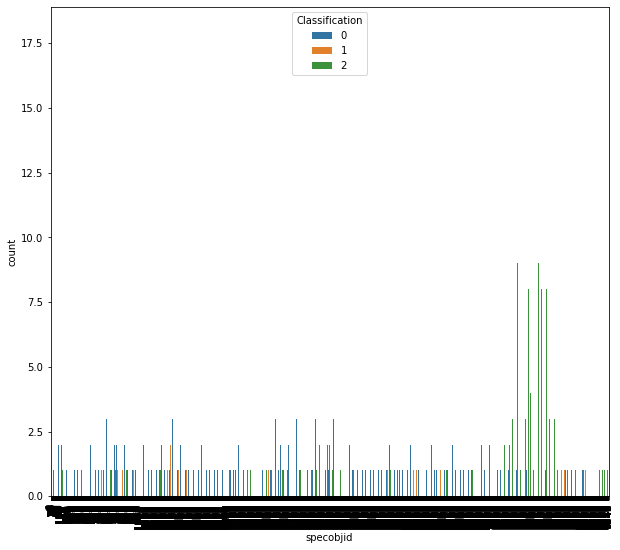

In [106]:
plt.figure(figsize=(10,9))
sns.countplot(x="specobjid",hue="Classification",data=df)
plt.xticks(rotation=90)

in above count plot we can see the Object Identifier observation with classification of 1=QSO, 2=Star and 0=Galaxy

In [107]:
df.drop(['rerun'],axis=1,inplace=True)
df.head(5)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,Classification,redshift,plate,mjd,fiberid
0,0,5378,4030,8818,3143,1853,1594,1474,3,3,256,5641,2,1681,267,182,490
1,0,5392,4145,4066,3722,4220,4703,4956,3,3,256,2267,2,1437,49,6,540
2,0,5405,4118,8203,8155,7210,6793,6350,3,3,257,1289,0,8222,21,80,512
3,0,5458,3910,1569,1960,2431,2897,3415,3,3,258,5642,2,1162,267,182,509
4,0,5462,4064,1206,1255,3347,4943,5701,3,3,258,5642,2,3501,267,182,511


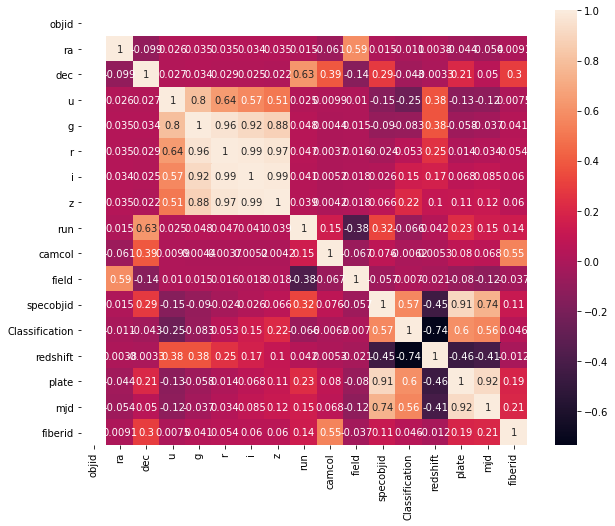

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmax=1)
plt.show()

We drop one attributes which was constant in given dataset for seeing better correlation in heatmaap, and here we can  easily see positive and negative correlation

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text major ticklabel objects>)

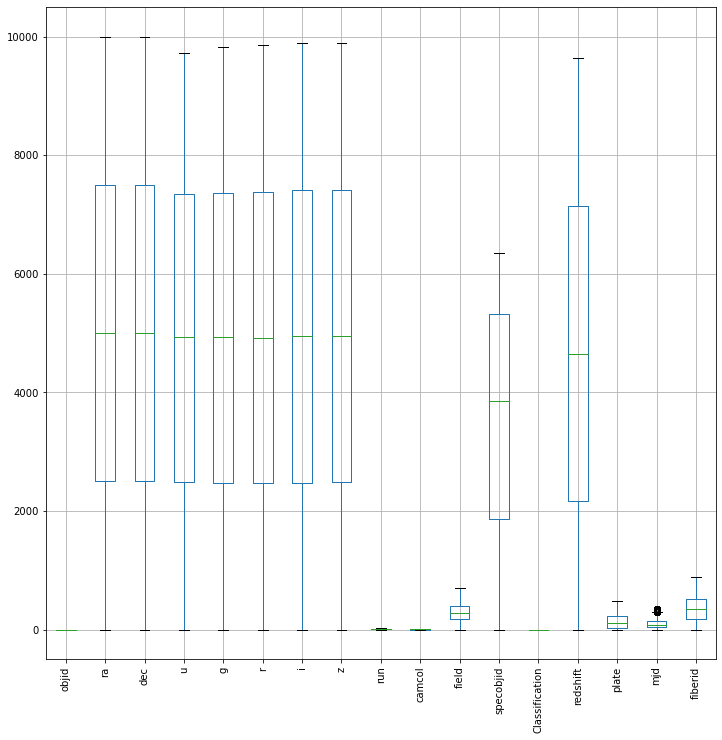

In [109]:
df.boxplot(figsize=(12,12));
plt.xticks(rotation=90)

We develope box xchart for understanding of Outliers in data

In [110]:
y = df['Classification']
x = df.drop('Classification', axis=1)
df['Classification']= df['Classification']

In [111]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=43)
y_test.shape

(2900,)

In [112]:
x_test.shape

(2900, 16)

We split data here into training and testing foor precessing the model

In [113]:
cri={'criterion':['gini', 'entropy']}
model_test= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test, param_grid=cri)

In [114]:
grid.fit(x_test,y_test)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.9862068965517242
gini
{'criterion': 'gini'}
/n


In [115]:
smoothing={'var_smoothing':[1e-09,None]}
model_test1= GaussianNB()
grid=GridSearchCV(estimator=model_test1, param_grid=smoothing)

In [116]:
grid.fit(x_test,y_test)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.var_smoothing)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, None]})
0.9175862068965517
1e-09
{'var_smoothing': 1e-09}
/n


In [117]:
neighbor={'n_neighbors':[5,1,2,8,6,10,15,20]}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=neighbor)

In [118]:
grid.fit(x_test,y_test)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 1, 2, 8, 6, 10, 15, 20]})
0.9675862068965516
5
{'n_neighbors': 5}
/n


We used GridSearchCV form using best parameter in our model

In [119]:


model=[LogisticRegression(),GaussianNB(var_smoothing=1e-09),SVC(),KNeighborsClassifier(weights='uniform',n_neighbors=20),RandomForestClassifier(criterion='gini')]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(' Score = \n',m,'is :')
    print(explained_variance_score(y_test,predm))
    print(r2_score(y_test,predm))
    print(mean_tweedie_deviance(y_test,predm))
    print('\n')

 Score = 
 LogisticRegression() is :
0.8696209670084071
0.8696188879793136
0.1193103448275862


 Score = 
 GaussianNB() is :
0.7638250237139256
0.762224041372679
0.21758620689655173


 Score = 
 SVC() is :
0.9423678841980795
0.9423459244532804
0.05275862068965517


 Score = 
 KNeighborsClassifier(n_neighbors=20) is :
0.9254408191374628
0.9253888434101275
0.06827586206896552


 Score = 
 RandomForestClassifier() is :
0.975887940331865
0.9758832625164049
0.022068965517241378




Here,  Random forest Classifier is giving us better result and accuracy than others

In [120]:
import joblib
joblib.dump(RandomForestClassifier(),'M20_P8_Space_Dataset.obj')

['M20_P8_Space_Dataset.obj']